 CREDITCARD FRAUD DETECTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv.zip to creditcard.csv.zip


In [6]:
creditcard_df = pd.read_csv('creditcard.csv.zip')
creditcard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
creditcard_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
creditcard_df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [11]:
creditcard_df['Class'].value_counts()

,count
Class,
0,284315
1,492


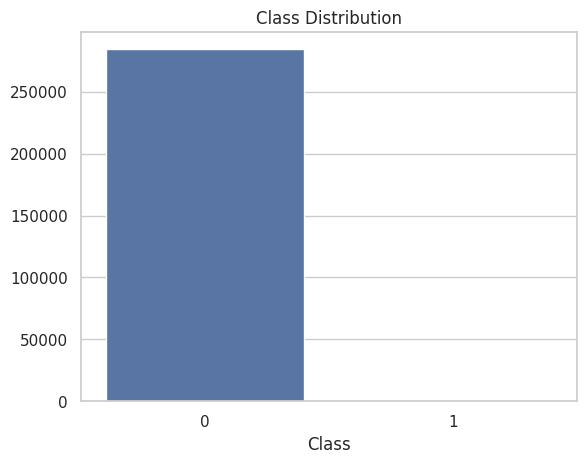

In [13]:
sns.set(style = 'whitegrid')
class_count = creditcard_df['Class'].value_counts()
sns.barplot(x = class_count.index, y = class_count.values)
plt.title('Class Distribution')
plt.show()

In [14]:
legit = creditcard_df[creditcard_df.Class == 0]
fraud = creditcard_df[creditcard_df.Class == 1]

In [15]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [16]:
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [17]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [18]:
creditcard_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [19]:
legit_sample = legit.sample(n = 492)
new_df = pd.concat([legit_sample, fraud], axis = 0)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42335,41059.0,1.256953,-1.584645,1.721454,-0.843189,-2.432071,0.190983,-1.812651,0.194028,-0.744714,...,-0.087445,0.445908,0.047291,0.648132,0.193112,-0.081508,0.116132,0.045142,56.12,0
249622,154500.0,-0.424685,1.326377,1.210367,3.418551,0.947623,0.825030,1.067415,0.074341,-1.780496,...,0.161023,0.473544,-0.216137,0.669885,0.210881,0.256470,0.093294,0.143784,58.76,0
94700,64993.0,1.260783,0.269724,0.516990,0.617451,-0.454529,-0.984245,0.080117,-0.220654,0.004570,...,-0.254626,-0.723147,0.132725,0.382103,0.227130,0.093960,-0.027302,0.019554,1.79,0
5939,6568.0,1.054348,0.491801,0.863445,2.480570,0.176703,0.744457,-0.306284,0.310745,0.460671,...,-0.304613,-0.735665,0.217876,-0.439436,0.006505,-0.258574,-0.012053,0.002942,4.44,0
148294,89684.0,-1.590445,2.407943,-1.122674,-0.527001,0.309794,-0.933724,0.338407,-2.839636,1.354633,...,2.405863,0.114638,0.181487,-0.099414,-0.133299,-0.156585,0.467417,0.247259,10.98,0


In [20]:
new_df['Class'].value_counts()

,count
Class,
0,492
1,492


In [21]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92809.430894,-0.019280,0.031123,-0.005349,0.072380,0.088570,-0.040972,-0.028421,-0.000378,-0.029592,...,0.029141,-0.003947,0.033650,0.020909,0.008967,-0.023712,0.013070,0.022811,0.007685,78.741585
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [35]:
x=new_df.drop(columns='Class',axis=1)
y=new_df['Class']
print(x)
print(y)

            Time        V1        V2        V3        V4        V5        V6  \
42335    41059.0  1.256953 -1.584645  1.721454 -0.843189 -2.432071  0.190983   
249622  154500.0 -0.424685  1.326377  1.210367  3.418551  0.947623  0.825030   
94700    64993.0  1.260783  0.269724  0.516990  0.617451 -0.454529 -0.984245   
5939      6568.0  1.054348  0.491801  0.863445  2.480570  0.176703  0.744457   
148294   89684.0 -1.590445  2.407943 -1.122674 -0.527001  0.309794 -0.933724   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(984, 30) (787, 30) (197, 30)
(984,) (787,) (197,)


In [25]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

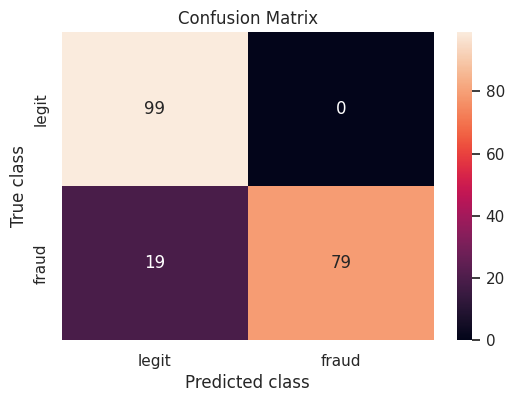

In [32]:
y_pred_log = model.predict(x_test)
LABELS = ['legit','fraud']
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred_log.round())
plt.figure(figsize=(6, 4))
sns.heatmap(conf, xticklabels=LABELS, yticklabels=LABELS, annot = True,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

In [33]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = mean_squared_error(x_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.08687526655067677


In [34]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = mean_squared_error(x_test_prediction, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.10038145213529515
